# Задание
* Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
* Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки
* Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите вакансии с использованием python, которые вам интересны
* Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
* Постройте график наиболее востребованных навыков

In [90]:
import requests
from tqdm.auto import tqdm
from time import sleep
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time

## Задание 1
#### Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)


документация по запросу тут https://api.hh.ru/openapi/redoc#tag/Poisk-vakansij-dlya-soiskatelya/operation/get-vacancies-similar-to-resume

Россия = 113
Москва - 1 (родительский 113)

для сбора по все России используем регион по дефолту
для запроса всех данных ????

In [124]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [125]:
res_moscow = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [130]:
#res_moscow.content # что получил запрос

In [131]:
data_moscow = json.loads(res_moscow.content) 

In [135]:
vacancies_moscow = res.json()
num_pages = vacancies.get('pages')
vacancy_moscow_ids = [el.get('id') for el in vacancies.get('items')]

In [137]:
data_df = pd.DataFrame(data)

In [140]:
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)
    sleep(5)

  0%|          | 0/20 [00:00<?, ?it/s]

In [139]:
len(all_vacancy_ids)

2000

## Задание 2
#### Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии

In [18]:
vac_id = 43326020
url = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url)
vacancy = res.json()
type(vacancy)

dict

In [19]:
df = pd.json_normalize(vacancy)

In [21]:
vac_dict_test = []
for vac_id in tqdm(all_vacancy_ids_test):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vac_dict_test.append(res.json())
    sleep(3)

  0%|          | 0/22 [00:00<?, ?it/s]

In [141]:
vac_dict_test = []
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vac_dict_test.append(res.json())
    sleep(3)

  0%|          | 0/1536 [00:00<?, ?it/s]

In [149]:
vacancy_df_test = pd.json_normalize(vac_dict_test)

In [150]:
vacancy_df_test.head(3)

,id,premium,relations,name,insider_interview,response_letter_required,salary,address,allow_messages,contacts,...,address.metro_stations,test.required,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,department,immediate_redirect_url
0,79050720,False,[],Переводчик,None,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78996021,False,[],Исполнительный директор,None,False,NaN,NaN,False,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75313444,False,[],Персональный Менеджер Премьер,None,False,NaN,NaN,False,None,...,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Решение на вакансиях в Москве

In [151]:
vacancy_df_test['key_skills'].apply(lambda list_with_dicts: ','.join([x.get('name') for x in list_with_dicts]))

0        Деловая переписка,Английский язык,Грамотная речь
1                                                        
2                                                        
3                                                        
4                                                        
                              ...                        
1531    Проведение презентаций,Деловое общение,Прямые ...
1532    Активные продажи,B2C продажи,Работа в команде,...
1533      Деловое общение,Прямые продажи,Активные продажи
1534    Проведение презентаций,Прямые продажи,Активные...
1535    Проведение презентаций,Деловое общение,Прямые ...
Name: key_skills, Length: 1536, dtype: object

In [27]:
#Создайте DataFrame в котором будут даты публикации вакансий, названия, описания, только добавьте поле ключевые навыки

In [152]:

vac_desccription_test = vacancy_df_test[['id', 'published_at', 'name', 'description','key_skills']]



In [153]:
vac_desccription_test.head(3)

,id,published_at,name,description,key_skills
0,79050720,2023-04-07T15:34:39+0300,Переводчик,<p>В отдел переводов ищем письменного переводч...,"[{'name': 'Деловая переписка'}, {'name': 'Англ..."
1,78996021,2023-04-06T13:40:19+0300,Исполнительный директор,<p>Команда управления по работе со специальным...,[]
2,75313444,2023-04-06T11:26:42+0300,Персональный Менеджер Премьер,<p>Сбер — лучший работодатель России. У нас 14...,[]


In [154]:
vac_desccription_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1536 non-null   object
 1   published_at  1536 non-null   object
 2   name          1536 non-null   object
 3   description   1536 non-null   object
 4   key_skills    1536 non-null   object
dtypes: object(5)
memory usage: 60.1+ KB


In [31]:
#Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам

In [155]:
vac_desccription_test['published_at'] = pd.to_datetime(vac_desccription_test['published_at'])

C:\Users\anvne\AppData\Local\Temp\ipykernel_67344\3370300031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac_desccription_test['published_at'] = pd.to_datetime(vac_desccription_test['published_at'])


In [156]:
vac_daily_pub_test = vac_desccription_test.groupby (vac_desccription_test.published_at.dt.date )['id'].count()

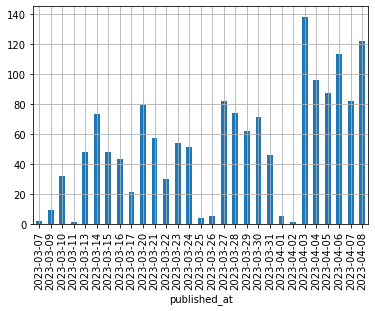

In [188]:
vac_daily_pub_test.plot(kind='bar')
plt.grid(True)
plt.show()

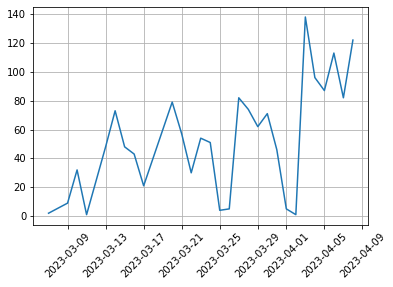

In [187]:
plt.plot(vac_daily_pub_test)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [36]:
#Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [159]:
vac_desccription_test['day_of_week'] = vac_desccription_test['published_at'].dt.weekday

C:\Users\anvne\AppData\Local\Temp\ipykernel_67344\2857570376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac_desccription_test['day_of_week'] = vac_desccription_test['published_at'].dt.weekday


In [161]:
vac_week_day_pub_test = vac_desccription_test.groupby (vac_desccription_test.published_at.dt.day_of_week)['id'].count()

In [189]:
vac_week_day_pub_test

published_at
0    347
1    302
2    227
3    290
4    232
5    132
6      6
Name: id, dtype: int64

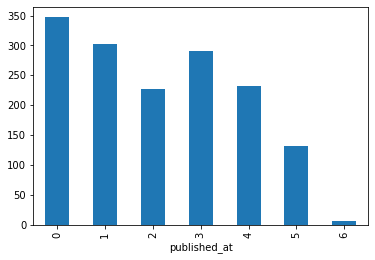

In [195]:
vac_week_day_pub_test.plot(kind='bar' )
#fig,ax = plt.subplots()
#plt.plot(dates, values)
#values = range(7)
#dates = [datetime.now()-timedelta(days=_) for _ in range(7)]
#xlabels = ["Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс"]
#ax.set_xticklabels(xlabels)
plt.show()

In [164]:
#Найдите вакансии с использованием Python, которые вам интересны

In [174]:
mask_name = vac_desccription_test['name'].str.contains("Python")
vac_desccription_test.loc[mask_name]

,id,published_at,name,description,key_skills,day_of_week
39,78887375,2023-04-04 12:23:58+03:00,Python разработчик (backend),"<p>Мы занимаемся разработкой систем, обеспечив...",[],1
97,78838620,2023-04-03 13:59:22+03:00,Python-разработчик,<p>В SberData мы создаем централизованное хран...,[],0
146,78717347,2023-03-30 11:38:32+03:00,Стажер (разработчик Python),<p>Внедрение новых и сопровождение (доработка/...,[],3
198,78767376,2023-03-31 13:08:18+03:00,Python developer,<p>Наш продукт: overload система для проведени...,[],4
203,78750849,2023-03-31 08:55:32+03:00,Python Developer,<p><strong>Кто мы?</strong></p> <p>Наша междис...,"[{'name': 'Python'}, {'name': 'Linux'}, {'name...",4
236,75700571,2023-04-03 08:57:30+03:00,Python-разработчик,<p>В SberData мы создаем централизованное хран...,[],0
246,76048443,2023-03-16 11:01:27+03:00,Middle/Senior Python-разработчик в Цифровые по...,<p>SberDevices — уникальное IT-пространство вн...,[],3
275,76971042,2023-03-23 13:25:28+03:00,Python-разработчик,"<p>SDN - это то, без чего не может существоват...","[{'name': 'Git'}, {'name': 'PostgreSQL'}, {'na...",3
318,78275267,2023-04-03 11:02:15+03:00,Python разработчик (Биометрия),"<p>Мы – сплоченная команда единомышленников, к...","[{'name': 'Python'}, {'name': 'Git'}, {'name':...",0
332,78884772,2023-04-04 11:50:29+03:00,Python Developer в омниканальные контактные це...,<p>Наша команда разрабатывает современную комм...,[],1


In [166]:
#Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий


In [167]:
vacancy_df_test['key_skills_list'] = vacancy_df_test['key_skills'].apply(lambda list_with_dicts: ', '.join([x.get('name') for x in list_with_dicts]))

In [196]:
key_skills_list = vacancy_df_test['key_skills_list'].tolist()

In [185]:
key_skills_list_all = ','.join(key_skills_list).split(',')
key_skills_list_all_df = pd.DataFrame(key_skills_list_all, columns = ['skills'])
key_skills_list_all_df['skills'] = key_skills_list_all_df['skills'].apply(lambda x: x.strip().lower())
key_skills_list_all_df[key_skills_list_all_df['skills'] != '']['skills'].value_counts()

sql                 132
python               97
активные продажи     96
git                  88
java                 81
                   ... 
azure                 1
1с: предприятие       1
1с: бухгалтерия       1
docker-compose        1
сбер                  1
Name: skills, Length: 478, dtype: int64

In [ ]:
#Постройте график наиболее востребованных навыков

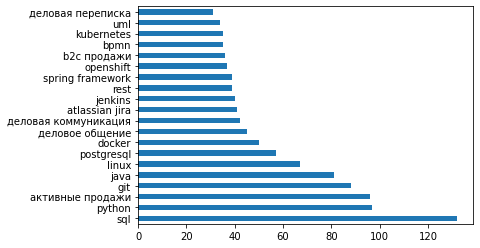

In [186]:
key_skills_list_all_df[key_skills_list_all_df['skills'] != '']['skills'].value_counts().loc[lambda x : x > 30].plot(kind='barh')
plt.show()

# Решение на большой выгрузке

In [ ]:
vac_dict = []
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vac_dict.append(res.json())

In [ ]:
#vac_dict

In [ ]:
#vacancy_df = pd.json_normalize(vac_dict) 

In [ ]:
#vacancy_df['key_skills'].dropna()

In [ ]:
#vacancy_df['key_skills'].apply(lambda list_with_dicts:','.join([x.get('name') for x in list_with_dicts]))

In [ ]:
#vacancy_df

In [265]:
#vacancy_df['key_skills'].apply(lambda list_with_dict:','.join([x.get('name') for x in list_with_dict]))